<a href="https://colab.research.google.com/github/peremartra/Large-Language-Model-Notebooks-Course/blob/main/P1-NL2SQL/NL2SQL_OpenAI_Azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<h1><a href="https://github.com/peremartra/Large-Language-Model-Notebooks-Course">Learn by Doing LLM Projects</a></h1>
    <h3>Understand And Apply Large Language Models</h3>
    <h2>Natural Language to SQL with LLMs</h2>
    <h3>Inferencing the NL2SQL on Azure</h3>
    by <b>Pere Martra</b>
</div>

<br>

<div align="center">
    &nbsp;
    <a target="_blank" href="https://www.linkedin.com/in/pere-martra/"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>
    
</div>

<br>
<hr>

In this notebook, we make a call to a GPT3.5 model that we've set up from Azure OpenAI Studio to function as a translator for SQL queries from natural language.

The prompt structure has been created and explained in a [previous article](https://colab.research.google.com/drive/1mbIAv1p6nqtsngXfCG5WrozlvmoJI06F#scrollTo=uxFVaxlskUf-&line=3&uniqifier=1), part of the Large Language Models course.

In [1]:
#Install openai
!pip install -q "openai<1.0.0"

In [2]:
import os
import openai


You can Obtain the **prompt**  the **api_base** and the **key** from the Sample Code window on Chat Playground in Azure Open Studio.

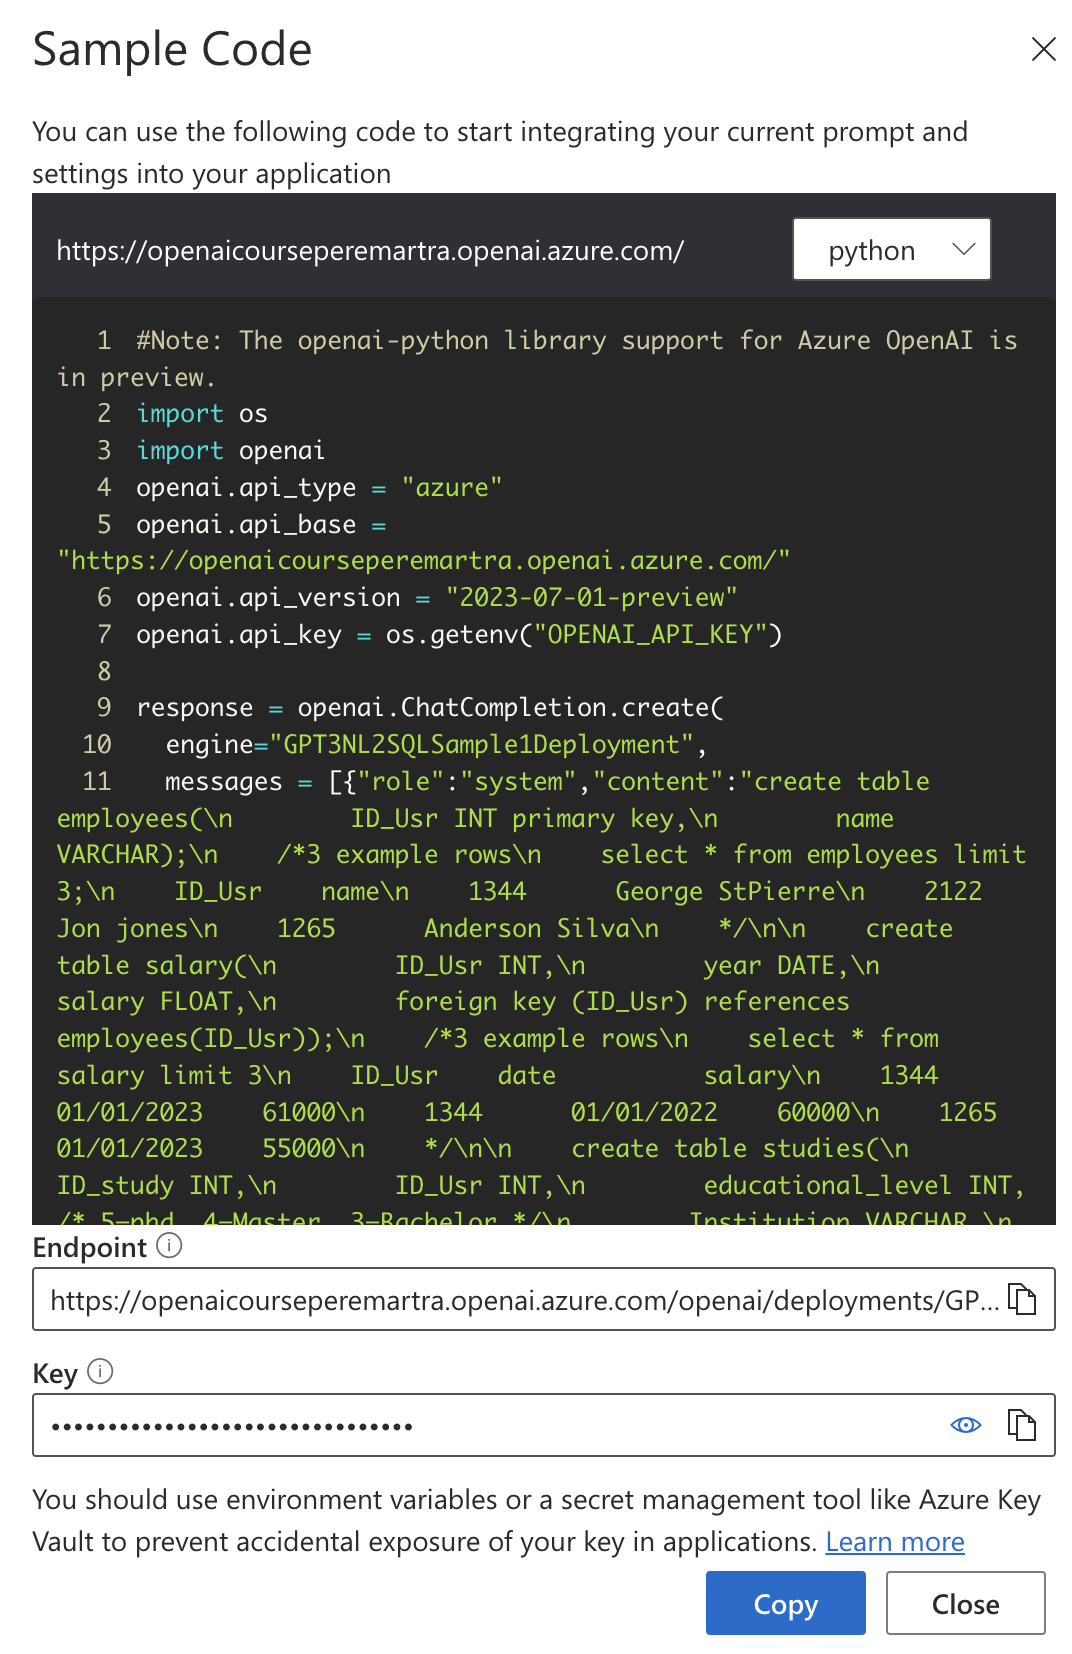

In [3]:
#Azure configuration
openai.api_type = "azure"
#Here the inference point that you can get from Azure
openai.api_base = "https://openaicourseperemartra.openai.azure.com/"
openai.api_version = "2023-07-01-preview"

openai.api_key = "azurekey"

In [4]:
context = [ {'role':'system', 'content':"""
    create table employees(\n        ID_Usr INT primary key,\n        name VARCHAR);\n    /*3 example rows\n    select * from employees limit 3;\n    ID_Usr    name\n    1344      George StPierre\n    2122      Jon jones\n    1265      Anderson Silva\n    */\n\n    create table salary(\n        ID_Usr INT,\n        year DATE,\n        salary FLOAT,\n        foreign key (ID_Usr) references employees(ID_Usr));\n    /*3 example rows\n    select * from salary limit 3\n    ID_Usr    date          salary\n    1344      01/01/2023    61000\n    1344      01/01/2022    60000\n    1265      01/01/2023    55000\n    */\n\n    create table studies(\n        ID_study INT,\n        ID_Usr INT,\n        educational_level INT,  /* 5=phd, 4=Master, 3=Bachelor */\n        Institution VARCHAR,\n        Years DATE,\n        Speciality VARCHAR,\n        primary key (ID_study, ID_Usr),\n        foreign key(ID_Usr) references employees (ID_Usr));\n    /*3 example rows\n    select * from studies limit 3\n    ID_Study ID_Usr educational_level Institution    Years       Speciality\n    2782     1344   3                 UC San Diego   01/01/2010  Bachelor of Science in Marketing\n    2334     1344   5                 MIT            01/01/2023  Phd. Data Science.\n    2782     2122   3                 UC San Diego   01/01/2010  Bachelor of Science in Marketing\n    */\n\n-Maintain the SQL order simple and efficient as you can, using valid SQL Lite, answer the following questions for the table provided above. \nQuestion: How Many employes we have with a salary bigger than 50000?"},{"role":"user","content":"How Many employes we have with a salary bigger than 50000?"},{"role":"assistant","content":"SELECT COUNT(*) AS total_employees\nFROM employees e\nINNER JOIN salary s ON e.ID_Usr = s.ID_Usr\nWHERE s.salary > 50000;"},{"role":"user","content":"Return the names of the three people who have had the highest salary increase in the last three years."},{"role":"assistant","content":"SELECT e.name\nFROM employees e\nJOIN salary s ON e.ID_usr = s.ID_usr\nWHERE s.year >= DATE_SUB(CURDATE(), INTERVAL 3 YEAR)\nGROUP BY e.name\nORDER BY (MAX(s.salary) - MIN(s.salary)) DESC\nLIMIT 3;
"""} ]

In [5]:
#Functio to call the model.
def return_CCRMSQL(user_message, context):

    newcontext = context.copy()
    newcontext.append({'role':'user', 'content':"question: " + user_message})

    response = openai.ChatCompletion.create(
      engine="GPT3NL2SQLSample1Deployment", #Our deployment
      messages = newcontext,
      temperature=0,
      max_tokens=800)

    return (response.choices[0].message["content"])

In [6]:
context_user = context.copy()
print(return_CCRMSQL("The name of the employee best paid", context_user))

SELECT e.name
FROM employees e
JOIN salary s ON e.ID_usr = s.ID_usr
WHERE s.salary = (SELECT MAX(salary) FROM salary);
This query will return the name of the employee with the highest salary.


In [7]:
print(return_CCRMSQL("Return the Institution with a higher average salary", context_user))

SELECT st.Institution, AVG(sa.salary) AS avg_salary
FROM studies st
JOIN employees e ON st.ID_Usr = e.ID_Usr
JOIN salary sa ON e.ID_Usr = sa.ID_Usr
GROUP BY st.Institution
ORDER BY avg_salary DESC
LIMIT 1;


#Conclusions.
Once you have the prompt to use, set up the OpenAI services in Azure is straightforward.

I observed some differences in the SQL from the one obtained calling directly to OpenAI API.

But both are correct, I can't explain why these differences.